In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.mode.chained_assignment = None
%matplotlib inline

Read CSV for each neighborhood

In [117]:
RovaBet = pd.read_csv(r'C:\Users\limor biran\Desktop\תואר\שנה ג סמסטר א\מדעי הנתונים\finalProject\rovaBet.csv',encoding = "ISO-8859-8")
RovaDaled = pd.read_csv(r'C:\Users\limor biran\Desktop\תואר\שנה ג סמסטר א\מדעי הנתונים\finalProject\rovaDaled.csv',encoding = "ISO-8859-8")
RovaYudAlef = pd.read_csv(r'C:\Users\limor biran\Desktop\תואר\שנה ג סמסטר א\מדעי הנתונים\finalProject\rovaYudAlef.csv',encoding = "ISO-8859-8")
RovaVav = pd.read_csv(r'C:\Users\limor biran\Desktop\תואר\שנה ג סמסטר א\מדעי הנתונים\finalProject\rovaVav.csv',encoding = "ISO-8859-8")

In [118]:
copy_RovaBet = RovaBet.copy()
copy_RovaDaled = RovaDaled.copy()
copy_RovaYudAlef = RovaYudAlef.copy()
copy_RovaVav = RovaVav.copy()

In [119]:
def fix_cell_in_our_list(df,listOfStr,listOfNum,name):
    for str,num in zip(listOfStr,listOfNum):        
        df[name] = df[name].replace(str, num)
    new = df[name].isin(listOfNum)
    return df[new]

In [120]:
def fix_data(df):    
    
    headerList=['Date','Address','Rooms','Floor','Square','Price']
    for item in headerList:
        df.dropna(subset=[item], inplace=True)    
        
    #split the Date column into columns: Day, Month, Year
    df['Day'] = [d.split('.')[0] for d in df.Date]
    df['Month'] = [d.split('.')[1] for d in df.Date]
    df['Year'] = [d.split('.')[2] for d in df.Date]
    #Drop Date column
    df = df.drop(['Date'],axis = 1)
    
    df = df[~df['Rooms'].astype(str).str.contains('0.0')]
    
    listOfFloorStr = ['קרקע','ראשונה','שניה','שלישית','רביעית','חמישית','שישית','שביעית','שמינית','תשיעית','עשירית']
    listOfFloorNum = ['0','1','2','3','4','5','6','7','8','9','10']
    df = fix_cell_in_our_list(df,listOfFloorStr,listOfFloorNum,'Floor')   
    
    #We removed the " , " sign from the Price column
    df['Price'] = df['Price'].str.replace(',','')

    return df

convert values to numeric

In [121]:
def convert_values_to_float_or_int(df):
    
    indexOfCol = 0
    for column in df.columns:
        if indexOfCol > 0 : #Skip the addresses column
            if column != 'Rooms':
                df[column] = df[column].astype(int)
            else:
                df[column] = df[column].astype(float)
        indexOfCol = indexOfCol + 1    
    
    return df

In [122]:
def box_plot(df,name):
    sns.boxplot(x = df[name], color = 'pink')

Identify and remove abnormal values

In [123]:
def outlier(df,nameOfCol):
    
    Q1 = np.percentile(df[nameOfCol],25)
    Q3 = np.percentile(df[nameOfCol] , 75)
    IQR = Q3 - Q1    
    
    df[nameOfCol][(df[nameOfCol] < Q1 - 1.5*IQR ) | (df[nameOfCol] > Q3 + 1.5*IQR)] = np.nan
    df = df[df[nameOfCol].notna()]
    
    return df

In [124]:
def print_scatter_outliers(df):
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(df['Year'],df['Price'])
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    plt.show()

hello

In [125]:
def save_csv(df,name):
    df.to_csv(name,index=False, encoding = "ISO-8859-8")

# Rova-Bet

Rova Bet


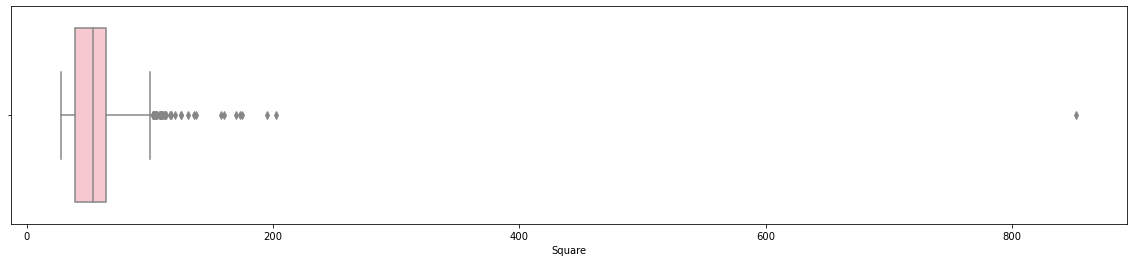

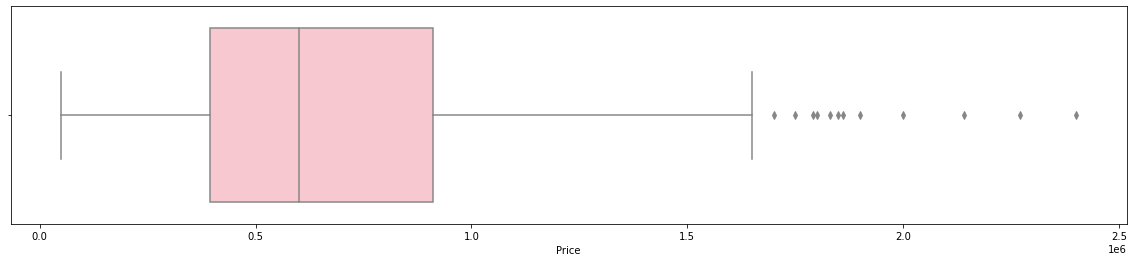

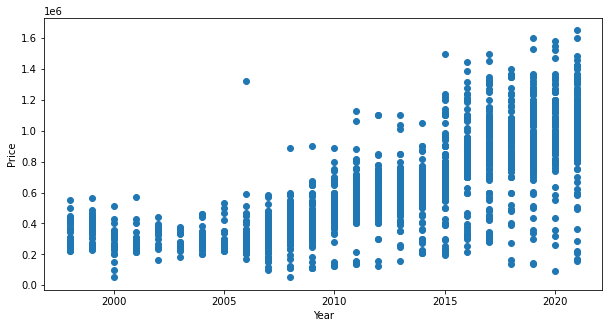

In [126]:
print("Rova Bet")
copy_RovaBet = fix_data(copy_RovaBet)
copy_RovaBet = convert_values_to_float_or_int(copy_RovaBet)
fig = plt.figure(figsize=(20, 4))
box_plot(copy_RovaBet,'Square')
fig = plt.figure(figsize=(20, 4))
box_plot(copy_RovaBet,'Price')
copy_RovaBet = outlier(copy_RovaBet,'Price')
copy_RovaBet = outlier(copy_RovaBet,'Square')
copy_RovaBet = copy_RovaBet.drop_duplicates()
print_scatter_outliers(copy_RovaBet)
save_csv(copy_RovaBet,"Rova Bet")

# Rova-Daled

Rova Daled


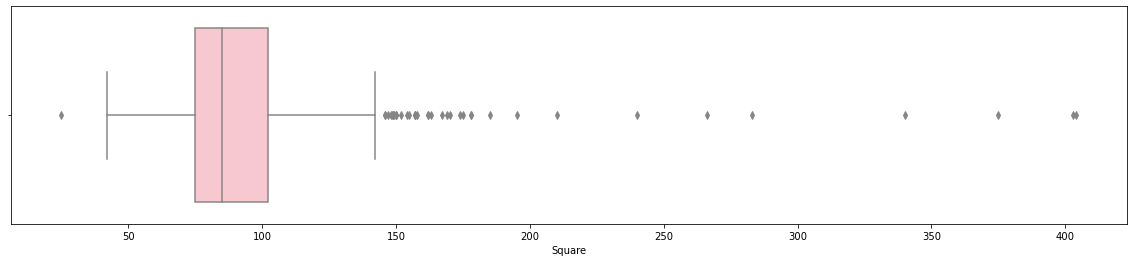

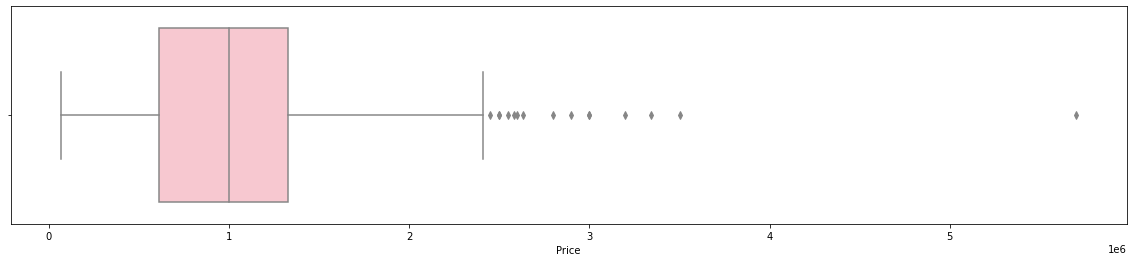

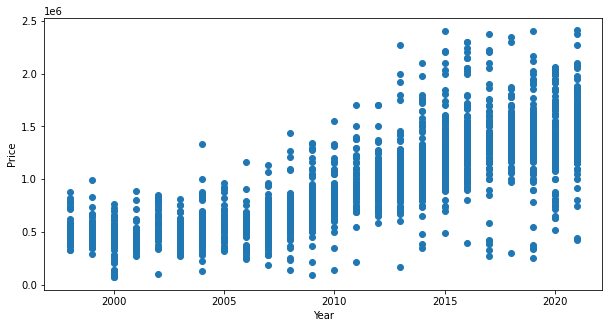

In [99]:
print("Rova Daled")
copy_RovaDaled = fix_data(copy_RovaDaled)
copy_RovaDaled = convert_values_to_float_or_int(copy_RovaDaled)
fig = plt.figure(figsize=(20, 4))
box_plot(copy_RovaDaled,'Square')
fig = plt.figure(figsize=(20, 4))
box_plot(copy_RovaDaled,'Price')
copy_RovaDaled = outlier(copy_RovaDaled,'Price')
copy_RovaDaled = outlier(copy_RovaDaled,'Square')
copy_RovaDaled = copy_RovaDaled.drop_duplicates()
print_scatter_outliers(copy_RovaDaled)
save_csv(copy_RovaDaled,"Rova Daled")

# Rova-Yud-Alef

Rova Yud Alef


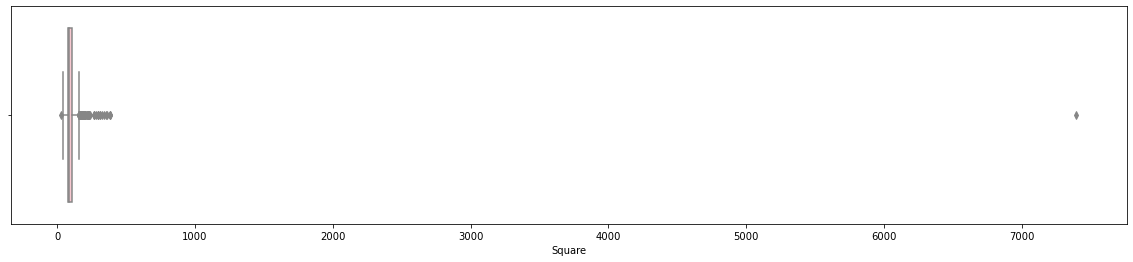

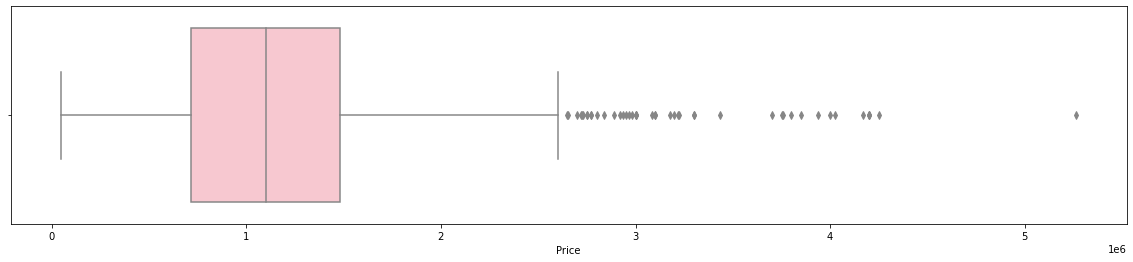

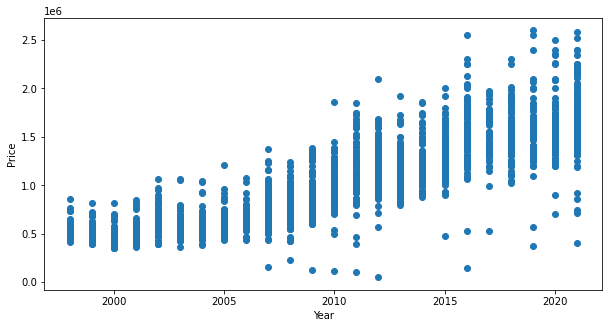

In [100]:
print("Rova Yud Alef")
copy_RovaYudAlef = fix_data(copy_RovaYudAlef)
copy_RovaYudAlef = convert_values_to_float_or_int(copy_RovaYudAlef)
fig = plt.figure(figsize=(20, 4))
box_plot(copy_RovaYudAlef,'Square')
fig = plt.figure(figsize=(20, 4))
box_plot(copy_RovaYudAlef,'Price')
copy_RovaYudAlef = outlier(copy_RovaYudAlef,'Price')
copy_RovaYudAlef = outlier(copy_RovaYudAlef,'Square')
copy_RovaYudAlef = copy_RovaYudAlef.drop_duplicates()
print_scatter_outliers(copy_RovaYudAlef)
save_csv(copy_RovaYudAlef,"Rova Yud Alef")

# Rova-Vav

Rova Vav


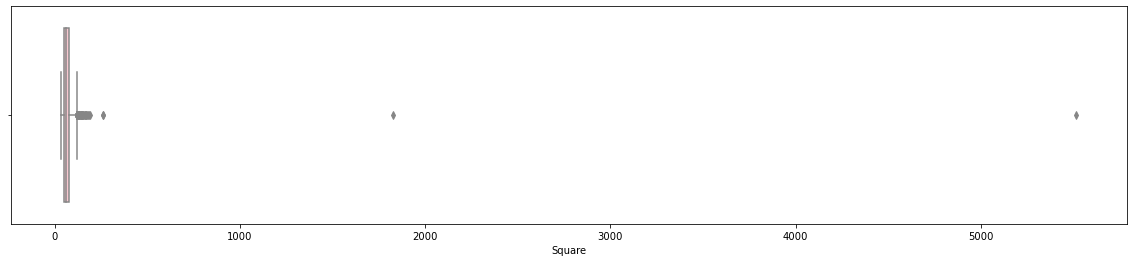

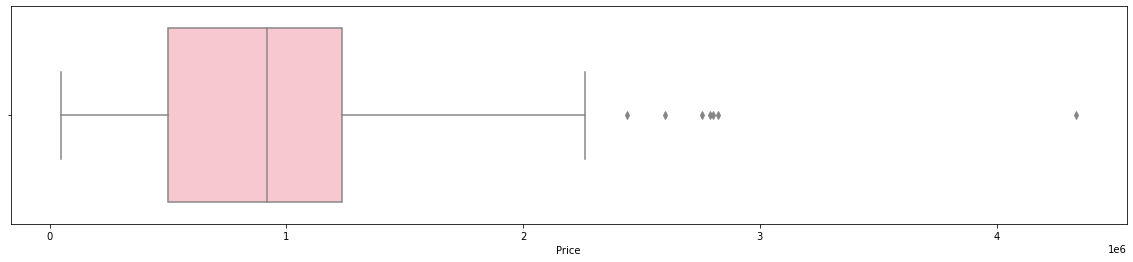

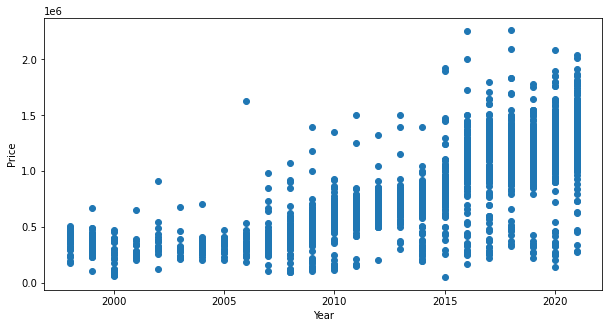

In [101]:
print("Rova Vav")
copy_RovaVav = fix_data(copy_RovaVav)
copy_RovaVav = convert_values_to_float_or_int(copy_RovaVav)
fig = plt.figure(figsize=(20, 4))
box_plot(copy_RovaVav,'Square')
fig = plt.figure(figsize=(20, 4))
box_plot(copy_RovaVav,'Price')
copy_RovaVav = outlier(copy_RovaVav,'Price')
copy_RovaVav = outlier(copy_RovaVav,'Square')
copy_RovaVav = copy_RovaVav.drop_duplicates()
print_scatter_outliers(copy_RovaVav)
save_csv(copy_RovaVav,"Rova Vav")